## COMP 4/6993.  Fall 2018. Assignment 3

### Due:  Wednesday, October 10, 2018 (before class starts)

In this assignment, we will use Linear Regression to explore 500_Person_Gender_Height_Weight_Index.csv dataset, which has 500 rows and 4 columns:

+ Gender: Male/Female
+ Height: Number(cm)
+ Weight: Number (Kg)
+ Index: 
    - 0: Extremely Weak
    - 1: Weak
    - 2: Normal
    - 3: Overweight
    - 4: Obesity
    - 5: Extreme Obesity

Use this dataset to answer these questions:

#### (1) Build a linear model to correlate Height and Weight and show the training score. (15 points)


In [71]:
# write your code here
import pandas, seaborn, matplotlib
from sklearn import linear_model

df = pandas.read_csv('500_Person_Gender_Height_Weight_Index.csv')
#df = df[df.Gender == 'Male']
X = df[[ 'Weight']]
y = df['Height']

#seaborn.relplot(x='Weight', y='Height', hue='Index' , data=df)

model  = linear_model.LinearRegression()
model.fit(X,y)
training_score = model.score(X,y)
print('Training Score: ', training_score)

Training Score:  1.9886705759919465e-07


#### (2) Validate your model using the Repeated Subsampling method (with a large number of iterations, e.g 1000). You have to write your own code to do this. Do not use sklearn's built-in facility. (20 points)


In [59]:
# write your code here
import random
def train_test_split2(X, y, test_size ):
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for i in range(X.size):
        if random.random() <=  test_size:
            X_test.append(X.iloc[i])
            y_test.append(y.iloc[i])
        else:
            X_train.append(X.iloc[i])
            y_train.append(y.iloc[i])
            
    X_train = pandas.DataFrame(X_train, columns = X.columns)
    y_train = pandas.Series(y_train)
    
    X_test = pandas.DataFrame(X_test, columns = X.columns)
    y_test = pandas.Series(y_test)
        
    return X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
def validate(X,y,n):
    scores = [ ]
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split2(X, y, test_size = 0.5)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    return sum(scores)/n

validate(X,y,100)
#a = train_test_split(X, y, test_size = 0.5)
#print(a)


-0.014811028155779003

#### (3) Implement the Leave-One-Out Cross Validation.  You should define a Python method to do this.  Use it to validate your model. (20 points)
    


In [60]:
# write your code here

def leave_one_out(X, y, i):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    X_test.append(X.iloc[i])
    y_test.append(y.iloc[i])
    X_test = pandas.DataFrame(X_test, columns = X.columns)
    y_test = pandas.Series(y_test)
    
    for j in range(X.size):
        if j != i:
                X_train.append(X.iloc[i])
                y_train.append(y.iloc[i])
    
    X_train = pandas.DataFrame(X_train, columns = X.columns)
    y_train = pandas.Series(y_train)
    
    return X_train, X_test, y_train, y_test

def cross_validation(X, y):
    scores = [ ]
    for i in range(X.size):
        X_train, X_test, y_train, y_test = leave_one_out(X, y, i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    return sum(scores)/X.size


cross_validation(X, y)


1.0

#### (4) Would it be better to model the relationship between Height and Weight by separating genders (i.e. one for men, one for women)? Explain with evidence. (15 points)

In [61]:
# write your code here
df_male = df[df.Gender == 'Male']
X = df_male[[ 'Weight']]
y = df_male['Height']
model_male = linear_model.LinearRegression()
model_male.fit(X,y)
training_score_male = model_male.score(X,y)

df_female = df[df.Gender == 'Female']
X = df_female[[ 'Weight']]
y = df_female['Height']
model_female = linear_model.LinearRegression()
model_female.fit(X,y)
training_score_female = model_male.score(X,y)

print('Male Score: ', training_score_male)
print('Female Score: ', training_score_female)


Male Score:  0.0006829275267122847
Female Score:  -0.003804995427036717


#### (5) Would it be better to model the relationship between Height and Weight by looking at health conditions? Again, explain with evidence. (15 points)

In [62]:
X = df[[ 'Index','Weight']]
y = df['Height']
model = linear_model.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.5063546538807271

#### (6) Compare the statistics of health condition (Index column) by choosing appropriate visualization(s) of the dataset. (15 points)

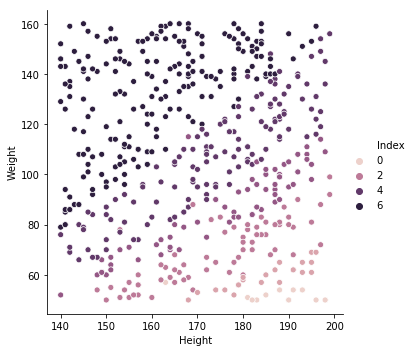

In [70]:
seaborn.relplot(x='Height', y='Weight', hue='Index', data=df)




**How to turn in your assignment**
If your name is John Smith, for Assignment 3, you should turn in a zipped folder named: COMP4993_A3_SmithJohn.zip

Turn in your jupyter notebook. If you have external Python code, put it in a zipped folder together with your Jupyter notebook. You may want to demonstrate the utility call your code in the notebook.

Upload your submission to the Assignment 3 folder in the eCourseware Dropbox.

**Please read carefully the plagiarism policy described in the syllabus**

** If you have any question, please contact the TA (dpham2@memphis.edu) ** 

